<a href="https://colab.research.google.com/github/chindimaga/SHALA2020/blob/master/DS_L4_22_Apr_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLE and Hypothesis Testing

### Read the given csv file [```q4.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv) of samples. Assume that it is drawn from a exponential distribution. What is the difference of log likelihoods for $\lambda = 1$ and $\lambda = 2$ ? Which of the two is more strongly supported?

In [0]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

In [0]:
url = 'https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv'
data = pd.read_csv(url,header=None)
data.head()

,0,1
0,0,0.019404
1,1,0.043634
2,2,0.023797
3,3,0.444340
4,4,0.578160


# PDF of exponential distribution is $\lambda e^{-\lambda x}$
Define a function to find pdf. You can use any module to get pre-defined functions also. And then find the likelihood and log-likelihood

In [0]:
def pdf_exp(lam,x):
    return lam * np.exp(-1*lam*x)

likelihood_1 = np.prod(pdf_exp(1,data[1].values))
likelihood_2 = np.prod(pdf_exp(2,data[1].values))

log_likelihood_1 = np.log(likelihood_1)
log_likelihood_2 = np.log(likelihood_2)

print("When lambda = 1, likelihood is {} and log-likelihood is {}".format(likelihood_1,log_likelihood_1))
print("When lambda = 2, likelihood is {} and log-likelihood is {}".format(likelihood_2,log_likelihood_2))

When lambda = 1, likelihood is 5.52106601597132e-22 and log-likelihood is -48.94830108538966
When lambda = 2, likelihood is 3.864074103681613e-13 and log-likelihood is -28.581884114784785


### Read the csv files [```q4_1.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv) and [```q4_2.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv) to get samples from two unknown distributions. Choose a significance level and implement the the most general two-sample t-test

In [0]:
sample1 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv',header=None)
sample2 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv',header=None)

Find the parameters required to compute the T statistic

In [0]:
significance = 0.05
mu1 = np.mean(sample1[1].values)
s1 = np.var(sample1[1].values)
n1 = sample1[1].shape[0]
mu2 = np.mean(sample2[1].values)
s2 = np.var(sample2[1].values)
n2 = sample2[1].shape[0]

Find the degrees of freedom to get the critical value

In [0]:
df = np.square((s1**2)/n1 +(s2**2)/n2)/((((s1**2)/n1)**2)/(n1-1)+(((s1**2)/n1)**2)/(n2-1))

Compare the critical value and the T statistic and conclude whether null hypothesis is accepted or not. Print 'YES' is it is rejected, otherwise print 'NO'.

In [0]:
T = (mu1 - mu2)/np.sqrt(s1/n1 +s2/n2)
critical = stats.t.pdf(1-significance/2,df)
if np.abs(T) > critical:
    print('YES')
else:
    print('NO')

YES


Plot the distribution of both the samples to visualize

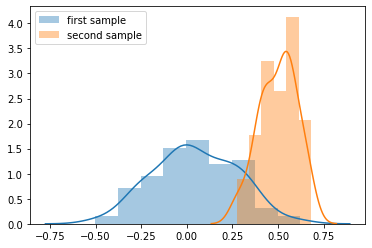

In [0]:
sns.distplot(sample1[1].values)

sns.distplot(sample2[1].values)
plt.legend(['first sample','second sample'])
plt.show()